In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [46]:
# ================================
# 2. LOAD DATASET
# ================================

file_path = r"C:\Users\ASUS\baru\data_kemiskinan_bersih.csv"   # sesuaikan lokasi file
df = pd.read_csv(file_path)

df.head()


,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Rata-rata Lama Sekolah Penduduk 15+ (Tahun),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Umur Harapan Hidup (Tahun),Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,Persentase rumah tangga yang memiliki akses terhadap air minum layak,Tingkat Pengangguran Terbuka,Tingkat Partisipasi Angkatan Kerja,PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan
0,ACEH,Simeulue,18.98,9.48,7148,66.41,65.28,71.56,87.45,5.71,71.15,1648096,0
1,ACEH,Aceh Singkil,20.36,8.68,8776,69.22,67.43,69.56,78.58,8.36,62.85,1780419,1
2,ACEH,Aceh Selatan,13.18,8.88,8180,67.44,64.40,62.55,79.65,6.46,60.85,4345784,0
3,ACEH,Aceh Tenggara,13.41,9.67,8030,69.44,68.22,62.71,86.71,6.43,69.62,3487157,0
4,ACEH,Aceh Timur,14.45,8.21,8577,67.83,68.74,66.75,83.16,7.13,59.48,8433526,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 13 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Provinsi                                                              514 non-null    object 
 1   Kab/Kota                                                              514 non-null    object 
 2   Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)       514 non-null    float64
 3   Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                           514 non-null    float64
 4   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)          514 non-null    int64  
 5   Indeks Pembangunan Manusia                                            514 non-null    float64
 6   Umur Harapan Hidup (Tahun)                                            514 non-null    float64
 7  

In [55]:
df.isnull().sum()

Provinsi                                                                0
Kab/Kota                                                                0
Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)         0
Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                             0
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)            0
Indeks Pembangunan Manusia                                              0
Umur Harapan Hidup (Tahun)                                              0
Persentase rumah tangga yang memiliki akses terhadap sanitasi layak     0
Persentase rumah tangga yang memiliki akses terhadap air minum layak    0
Tingkat Pengangguran Terbuka                                            0
Tingkat Partisipasi Angkatan Kerja                                      0
PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)              0
Klasifikasi Kemiskinan                                                  0
dtype: int64

In [56]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='ignore')


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23992\3757818629.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [57]:
df = df.dropna(how='all')

In [58]:
df['Klasifikasi Kemiskinan'] = df['Klasifikasi Kemiskinan'].astype(int)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 13 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Provinsi                                                              514 non-null    object 
 1   Kab/Kota                                                              514 non-null    object 
 2   Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)       514 non-null    float64
 3   Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                           514 non-null    float64
 4   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)          514 non-null    int64  
 5   Indeks Pembangunan Manusia                                            514 non-null    float64
 6   Umur Harapan Hidup (Tahun)                                            514 non-null    float64
 7  

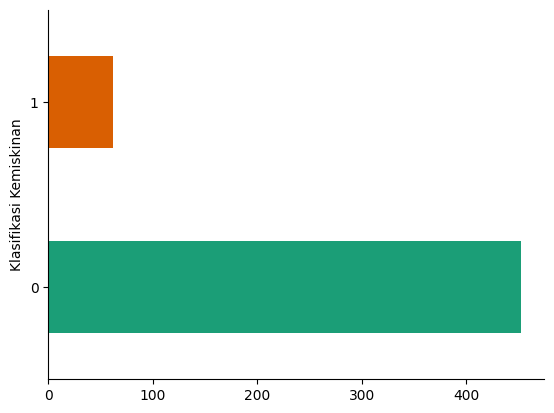

In [60]:
df.groupby('Klasifikasi Kemiskinan').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

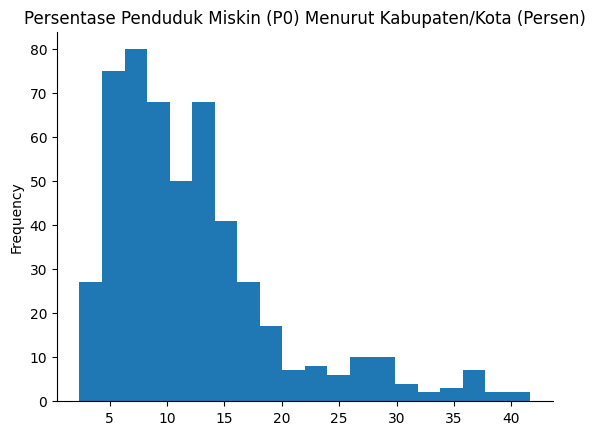

In [61]:
df['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'].plot(kind='hist', bins=20, title='Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)')
plt.gca().spines[['top', 'right',]].set_visible(False)


<Axes: xlabel='Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)', ylabel='Indeks Pembangunan Manusia'>

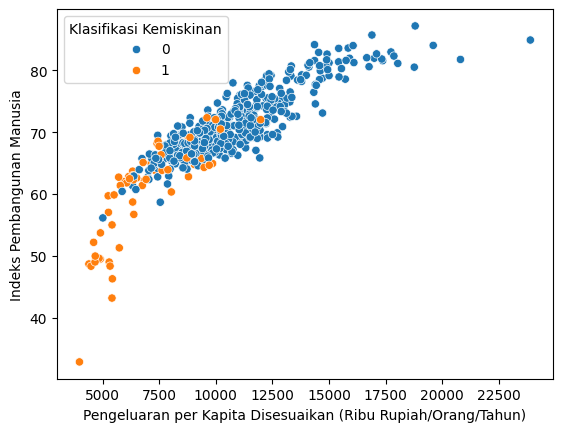

In [62]:
sns.scatterplot(x=df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)'], y=df['Indeks Pembangunan Manusia'], hue=df['Klasifikasi Kemiskinan'])

<Axes: xlabel='Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)', ylabel='Rata-rata Lama Sekolah Penduduk 15+ (Tahun)'>

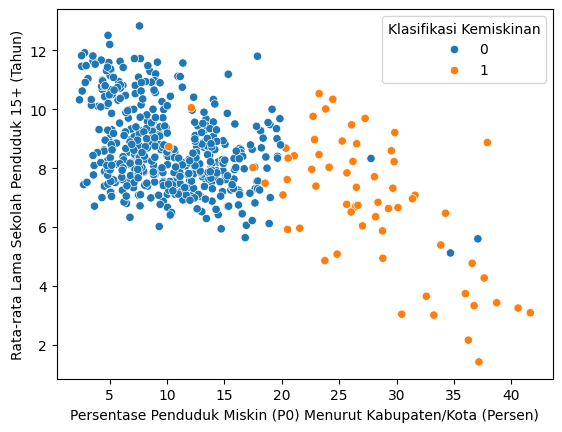

In [63]:
sns.scatterplot(x=df['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'], y=df['Rata-rata Lama Sekolah Penduduk 15+ (Tahun)'], hue=df['Klasifikasi Kemiskinan'])


<Axes: xlabel='Rata-rata Lama Sekolah Penduduk 15+ (Tahun)', ylabel='Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)'>

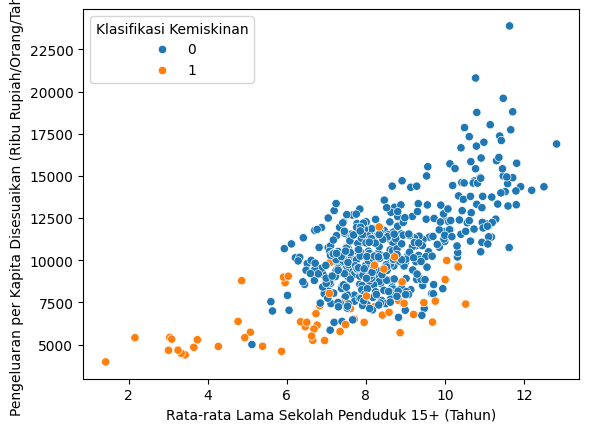

In [64]:
sns.scatterplot(x=df['Rata-rata Lama Sekolah Penduduk 15+ (Tahun)'], y=df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)'], hue=df['Klasifikasi Kemiskinan'])

<Axes: xlabel='Indeks Pembangunan Manusia', ylabel='Umur Harapan Hidup (Tahun)'>

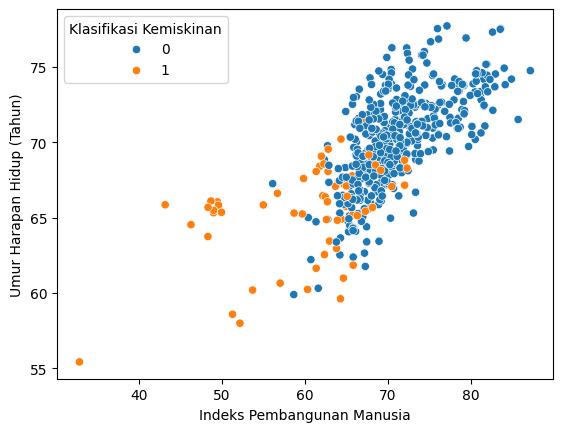

In [65]:
sns.scatterplot(x=df['Indeks Pembangunan Manusia'], y=df['Umur Harapan Hidup (Tahun)'], hue=df['Klasifikasi Kemiskinan'])

In [67]:
X_cluster = df[['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)', 'Rata-rata Lama Sekolah Penduduk 15+ (Tahun)']]

In [68]:
kmeans = KMeans(n_clusters=2, random_state=21)
df['Klaster K-Means'] = kmeans.fit_predict(X_cluster)

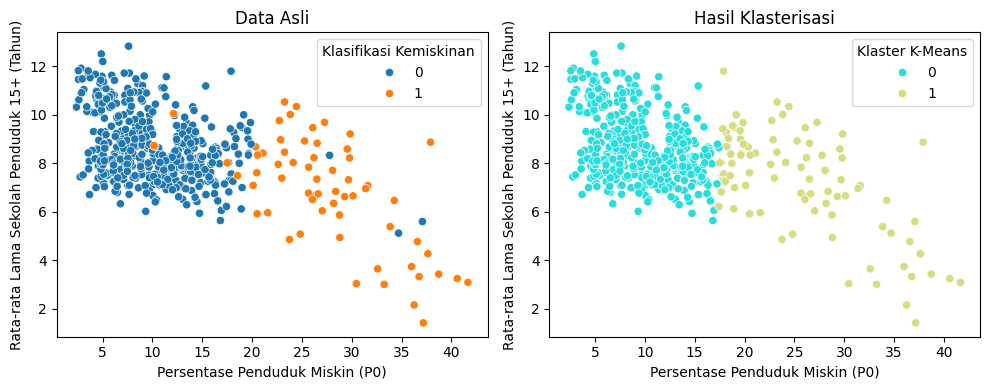

In [69]:
# Scatterplot data asli
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, plot pertama
sns.scatterplot(x=df['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'],
                y=df['Rata-rata Lama Sekolah Penduduk 15+ (Tahun)'],
                hue=df['Klasifikasi Kemiskinan'])
plt.title('Data Asli')
plt.xlabel('Persentase Penduduk Miskin (P0)')
plt.ylabel('Rata-rata Lama Sekolah Penduduk 15+ (Tahun)')

# Scatterplot hasil klasterisasi
plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, plot kedua
sns.scatterplot(x=df['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'],
                y=df['Rata-rata Lama Sekolah Penduduk 15+ (Tahun)'],
                hue=df['Klaster K-Means'], palette='rainbow')
plt.title('Hasil Klasterisasi')
plt.xlabel('Persentase Penduduk Miskin (P0)')
plt.ylabel('Rata-rata Lama Sekolah Penduduk 15+ (Tahun)')

plt.tight_layout()  # Untuk memastikan layout plot rapi
plt.show()

In [70]:
from sklearn.metrics import accuracy_score
# Menghitung akurasi K-Means
accuracy_nb = accuracy_score(df['Klasifikasi Kemiskinan'], df['Klaster K-Means'])
print(f"Akurasi K-Means: {accuracy_nb}")

Akurasi K-Means: 0.9396887159533074
